# 활성화 함수

In [ ]:
# 직선으로 풀 수 없는 문제를 변형을 주어 풀기 위해 활성화 함수를 사용

# input => hidden 
#           relu -> 주로 사용
#                   x>0 => x, x<0 => 0
#           tanh
#                   -1.0 ~ 1.0 순환신경망

# output
#           linear : 회귀분석
#           sigmoid : 0.0 ~ 1.0 이진분류
#           softmax : 다분류

# 회귀
# 분류
# 클러스터링

# 지도학습(라벨링 사용)
# 비지도학습(유사도 사용)
# 강화학습

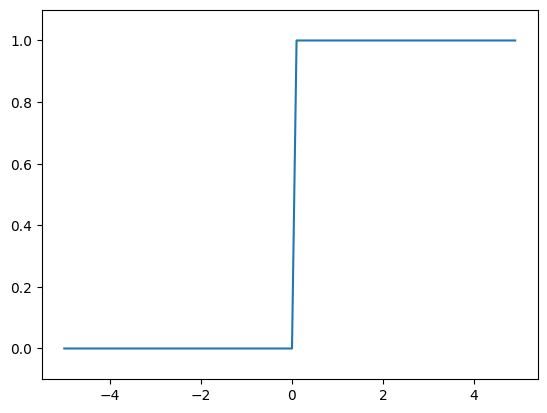

In [5]:
# 계단 함수(0보다 크면 1, 작으면 0)
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int32)

X = np.arange(-5.0, 5.0, 0.1)
y = step_function(X)

plt.plot(X, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

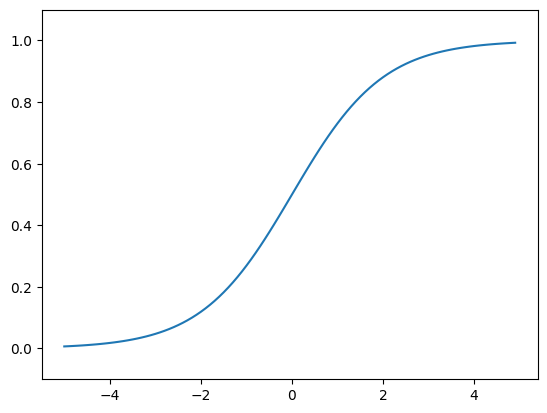

In [6]:
# 시그모이드 함수 (0이나 1에 가까운 값들은 학습이 잘 안됨 => 기울기 소실)
# np.exp() y=e의 x승
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)

plt.plot(X, y)
plt.ylim(-0.1, 1.1)
plt.show()

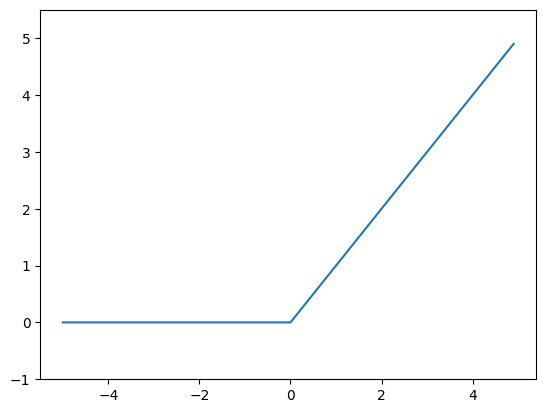

In [7]:
# ReLU(Rectified Linear Unit) 함수 (시그모이드 단점을 보완, 음수 값은 반영이 안됨, 값이 0일때 학습을 못함)
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [22]:
import math
import numpy as np 

def relu(x):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(0)          
    return values 
    
def leaky_relu(x, g):
    values=[]
    for i in x:
        if i > 0:
            values.append(i)
        else:
            values.append(g * i)    
    return values 

def gelu(x):
    return [0.5 * z * (1 + math.tanh(math.sqrt(2 / np.pi) * (z + 0.044715 * math.pow(z, 3)))) for z in x]

x=np.linspace(-10,10,100)

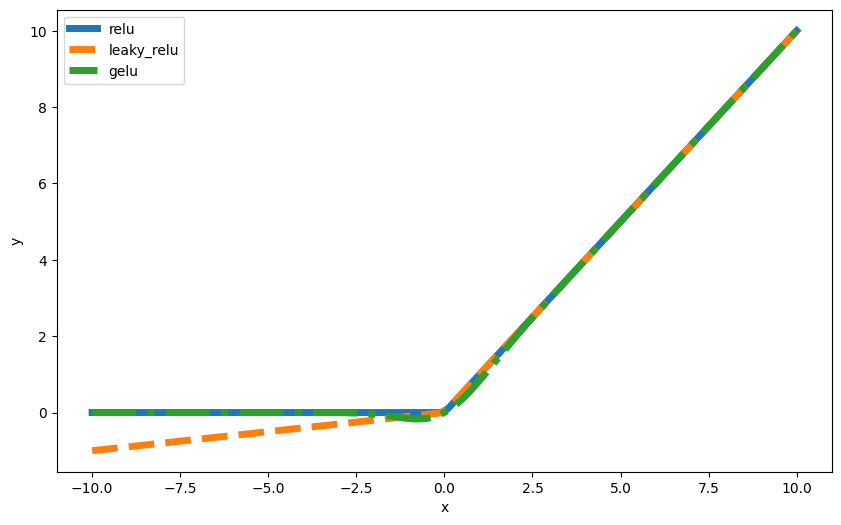

In [23]:
# leaky_relu : 음수가 0인 단점을 개선 한 방법, 0의 값 문제는 여전히 존재
# gelu : 0의 값에도 기울기를 주어 문제를 해결

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,relu(x),label='relu',ls='-',lw='5')
plt.plot(x,leaky_relu(x,0.1),label='leaky_relu',ls='--',lw='5')
plt.plot(x,gelu(x),label='gelu',ls='-.',lw='5')
plt.legend(labels=['relu','leaky_relu','gelu'])
plt.show()

[-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]
[-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


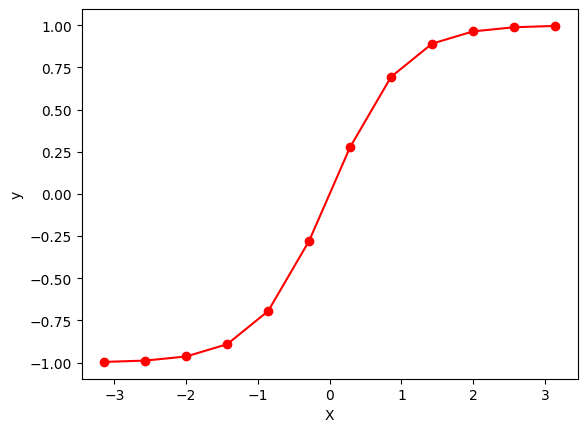

In [9]:
# tanh(Hyperbolic Tangent) 함수

# 확장된 시그모이드 함수
# 시그모이드는 0~1 사이 출력
# tanh는 -1 ~ 1
# 시그모이드보다 출력 범위가 더 넓고 경사면이 더 가파르기 때문에 더 빠르게 수렴하여 학습이 이루어질 수 있음
X = np.linspace(-np.pi, np.pi, 12)
y = np.tanh(X)

print(X)
print(y)

plt.plot(X, y, c = 'r', marker = "o")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# 항등함수
#신경망의 연산에는 행렬을 사용함
x=np.array([1, 0.5]) #입력값

#첫번째 은닉층
w1=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #가중치
b1=np.array([0.1, 0.2, 0.3]) #편향
a1=np.dot(x,w1)+b1 #첫번째 은닉층의 합계값
z1=sigmoid(a1)  #활성화함수

print("첫번째 은닉층")
print(a1)
print(z1)

#두번째 은닉층의 작업
w2=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #가중치
b2=np.array([0.1, 0.2]) #편향
a2=np.dot(z1,w2)+b2 #두번째 은닉층의 합계값
z2=sigmoid(a2)  #활성화함수

print("두번째 은닉층")
print(a2)
print(z2)

#항등함수: 항상 성립하는 등식,집합 X의 원소와 이에 대응하는 집합 Y의 원소가 항상 같음
def identity_function(x): #항등함수
    return x

w3=np.array([[0.1, 0.3], [0.2, 0.4]])
b3=np.array([0.1, 0.2])
a3=np.dot(z2,w3)+b3
y=identity_function(a3) #출력층의 활성화함수로 항등함수를 사용

print("항등함수")
print(y)

첫번째 은닉층
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
두번째 은닉층
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
항등함수
[0.31682708 0.69627909]


In [ ]:
# 소프트 맥스 함수

a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a) #지수함수
print(exp_a)

sum_exp_a=np.sum(exp_a) #지수함수의 합계
print(sum_exp_a)

y=exp_a / sum_exp_a
print(y)

def softmax(a):
    exp_a=np.exp(a) #지수함수
    #print(exp_a)

    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)

    y=exp_a / sum_exp_a
    return y


a=np.array([0.3,2.9,4.0])
print(softmax(a))
#무한대 문제가 발생함

a=np.array([1000,1100,1200])
print(softmax(a))

# 큰 값을 입력하면 지수계산 문제로 무한대가 나오게 되어 오류가 발생함
a=np.array([1010,1000,900])
print(np.exp(a) / np.sum(np.exp(a)))

#a의 최대값
c=np.max(a)

#a에서 최대값을 뺀 값
print(a-c)

#무한대 문제가 해결됨
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
[0.01821127 0.24519181 0.73659691]
[nan nan nan]
[nan nan nan]
[   0  -10 -110]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4992\1589689417.py:18: RuntimeWarning: overflow encountered in exp
  exp_a=np.exp(a) #지수함수
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4992\1589689417.py:25: RuntimeWarning: invalid value encountered in divide
  y=exp_a / sum_exp_a
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4992\1589689417.py:43: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4992\1589689417.py:43: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [ ]:
#무한대 문제를 해결한 소프트맥스 함수

def softmax(a):
    c = np.max(a)
    exp_a=np.exp(a-c) #지수함수
    #print(exp_a)

    sum_exp_a=np.sum(exp_a) #지수함수의 합계
    #print(sum_exp_a)

    y=exp_a / sum_exp_a
    return y

    

a=np.array([0.3,2.9,4.0])
print(softmax(a))

#무한대 문제가 해결됨
a=np.array([1000,1100,1200])
print(softmax(a))  

[0.01821127 0.24519181 0.73659691]
[1.38389653e-87 3.72007598e-44 1.00000000e+00]


In [ ]:
#소프트맥스 함수의 총합은 1

np.sum(softmax(a))

1.0

In [ ]:
print(softmax(a))

#소프트맥스 함수 출력의 총합은 1이 됨
#따라서 소프트맥스 함수의 출력결과를 확률로 해석할 수 있음
s=np.sum(softmax(a))
print(s)

#확률이 가장 높은 값의 인덱스
idx=np.argmax(softmax(a))
print(idx)

#확률이 가장 높은 값
print(a[idx])

[1.38389653e-87 3.72007598e-44 1.00000000e+00]
1.0
2
1200


In [46]:
# 행렬의 곱셈
a = np.array([[1,2], [3,4]])
print(a.shape)
print(a)

print('='*10)

b = np.array([[5,6], [7,8]])
print(b.shape)
print(b)
print(np.dot(a,b))

(2, 2)
[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]


In [47]:
#행렬의 곱셈

a=np.array([[1,2,3],[4,5,6]])
print(a.shape)
print(a)

print('='*10)

b=np.array([[1,2],[3,4],[5,6]])
print(b.shape)
print(b)

print(np.dot(a,b))

(2, 3)
[[1 2 3]
 [4 5 6]]
(3, 2)
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


In [49]:
# a=np.array([[1,2,3],[4,5,6]])

# c=np.array([[1,2],[3,4]])

# np.dot(a,c)

# # 2행 3열 x 2행 2열 에러
# #앞행렬의 열과 뒤 행렬의 행이 같아야 한다.